In [32]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import xlrd
import sklearn
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

2023-07-31 00:04:54.845615: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 00:04:55.073964: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-31 00:04:55.101314: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-31 00:04:55.101334: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [33]:
df=pd.read_csv('All_States_GE.csv')

/tmp/ipykernel_30075/2516659278.py:1: DtypeWarning: Columns (17,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('All_States_GE.csv')


In [34]:
df.columns

Index(['State_Name', 'Assembly_No', 'Constituency_No', 'Year', 'month',
       'Poll_No', 'DelimID', 'Position', 'Candidate', 'Sex', 'Party', 'Votes',
       'Candidate_Type', 'Valid_Votes', 'Electors', 'Constituency_Name',
       'Constituency_Type', 'Sub_Region', 'N_Cand', 'Turnout_Percentage',
       'Vote_Share_Percentage', 'Deposit_Lost', 'Margin', 'Margin_Percentage',
       'ENOP', 'pid', 'Party_Type_TCPD', 'Party_ID', 'last_poll', 'Contested',
       'Last_Party', 'Last_Party_ID', 'Last_Constituency_Name',
       'Same_Constituency', 'Same_Party', 'No_Terms', 'Turncoat', 'Incumbent',
       'Recontest', 'MyNeta_education', 'TCPD_Prof_Main',
       'TCPD_Prof_Main_Desc', 'TCPD_Prof_Second', 'TCPD_Prof_Second_Desc',
       'Election_Type'],
      dtype='object')

In [35]:
#preprocessing
df.drop(['Sub_Region'],axis=1)#dropping sub_region column because it is empty
df.drop(['Candidate'],axis=1)#dropping candidate column because it is empty


,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Sex,Party,...,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,Election_Type
0,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,1,M,INC,...,1.0,False,False,True,Graduate Professional,Business,NaN,Social Work,NaN,Lok Sabha Election (GE)
1,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,2,M,BJP,...,0.0,False,False,False,Graduate Professional,Liberal Profession or Professional,Lawyer,NaN,NaN,Lok Sabha Election (GE)
2,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,3,M,IND,...,0.0,False,False,False,Post Graduate,Agriculture,NaN,NaN,NaN,Lok Sabha Election (GE)
3,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,4,M,AAAP,...,0.0,False,False,True,12th Pass,Business,NaN,Politics,Municipality Member,Lok Sabha Election (GE)
4,Andaman_&_Nicobar_Islands,17,1,2019,4.0,0,4,5,M,BSP,...,0.0,False,False,False,Post Graduate,Social Work,NaN,NaN,NaN,Lok Sabha Election (GE)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91664,Mysore,3,23,1965,NaN,1,1,3,NaN,SWA,...,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)
91665,Uttar_Pradesh,3,76,1965,NaN,1,1,1,M,INC,...,1.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)
91666,Uttar_Pradesh,3,76,1965,NaN,1,1,2,NaN,IND,...,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)
91667,Uttar_Pradesh,3,76,1965,NaN,1,1,3,NaN,IND,...,0.0,False,False,False,NaN,NaN,NaN,NaN,NaN,Lok Sabha Election (GE)


In [36]:

print(df['Candidate_Type'])

0        GEN
1        NaN
2        NaN
3        GEN
4        NaN
        ... 
91664    NaN
91665    NaN
91666    NaN
91667    NaN
91668    NaN
Name: Candidate_Type, Length: 91669, dtype: object


In [37]:
df['Candidate_Type'].unique()
df['Party'].unique()
df['Year'].unique()

array([2019, 2020, 2021, 2014, 2015, 2016, 2017, 2018, 2009, 2011, 2012,
       2013, 2004, 2005, 2006, 2007, 2008, 1999, 2000, 2001, 2002, 2003,
       1998, 1996, 1997, 1991, 1992, 1993, 1994, 1995, 1989, 1984, 1985,
       1986, 1987, 1988, 1980, 1981, 1982, 1977, 1978, 1979, 1971, 1972,
       1967, 1968, 1969, 1970, 1962, 1963, 1964, 1965])

In [38]:
#filtering data only for 2004 to 2
years_to_remove=[1999,1998, 1996, 1997, 1991, 1992, 1993, 1994, 1995, 1989, 1984, 1985,
       1986, 1987, 1988, 1980, 1981, 1982, 1977, 1978, 1979, 1971, 1972,
           1967, 1968, 1969, 1970, 1962, 1963, 1964, 1965,2020, 2021, 2014, 2015, 2016, 2017, 2018, 2011, 2012,
       2013, 2005, 2006, 2007, 2008, 1999, 2000, 2001, 2002, 2003]
df1=df[~df['Year'].isin(years_to_remove)]


In [39]:
df1['Year'].unique()

array([2019, 2009, 2004])

In [40]:
# insight1 no. of female and male candidates for years 
gender_insight = df1.groupby(['Year', 'Sex']).size().reset_index(name='count')

In [41]:
pivot_data = gender_insight.pivot(index='Year', columns='Sex', values='count')

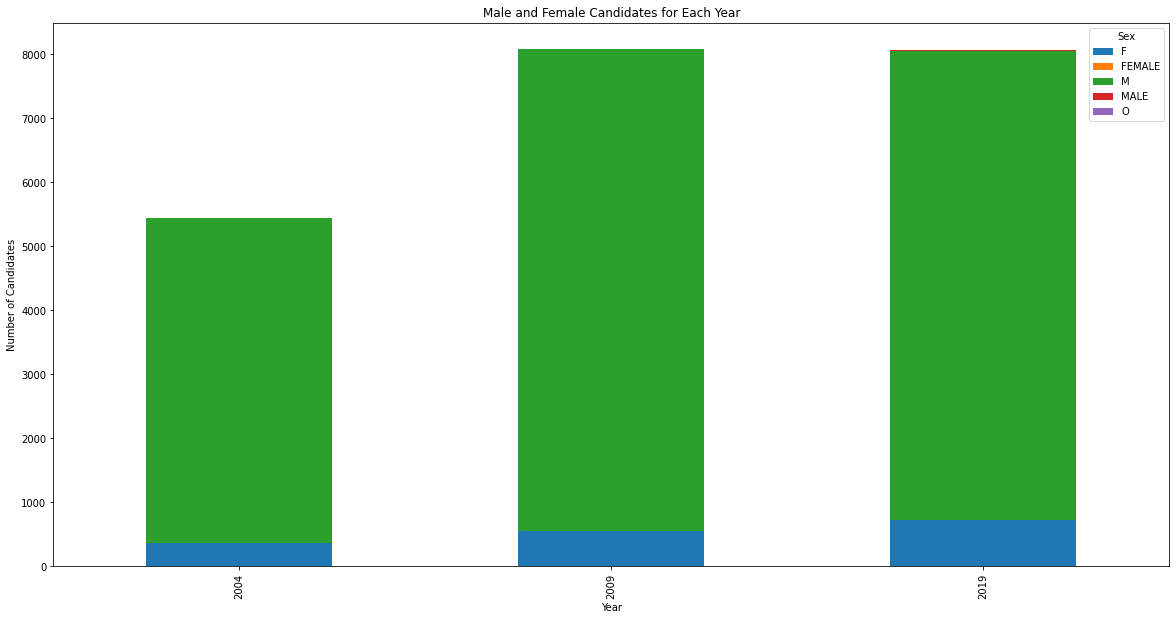

In [42]:

pivot_data.plot(kind='bar', stacked=True, figsize=(20,10), grid=False)

# Add labels and title

plt.xlabel('Year')
plt.ylabel('Number of Candidates')
plt.title('Male and Female Candidates for Each Year')


# Show the plot
plt.show()

In [43]:
correlation=df['Position'].corr(df['Party_ID'])
print(correlation)

0.11309796629038994


<AxesSubplot:xlabel='Party'>

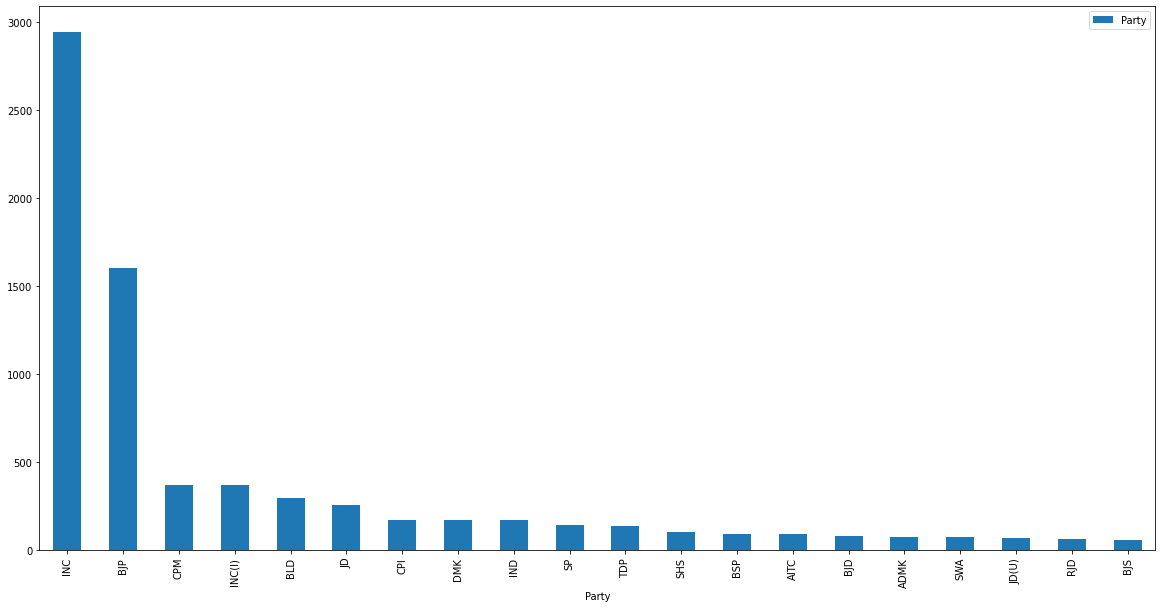

In [44]:
first_position=df.loc[(df['Position']==1)]
first_position_party=first_position.groupby(['Party'])['Party'].count().sort_values(ascending=False)
first_position_party=first_position_party.to_frame()
#print only top 20 parties
x=first_position_party.head(20)
x.plot(kind='bar',figsize=(20,10))


<AxesSubplot:xlabel='Party'>

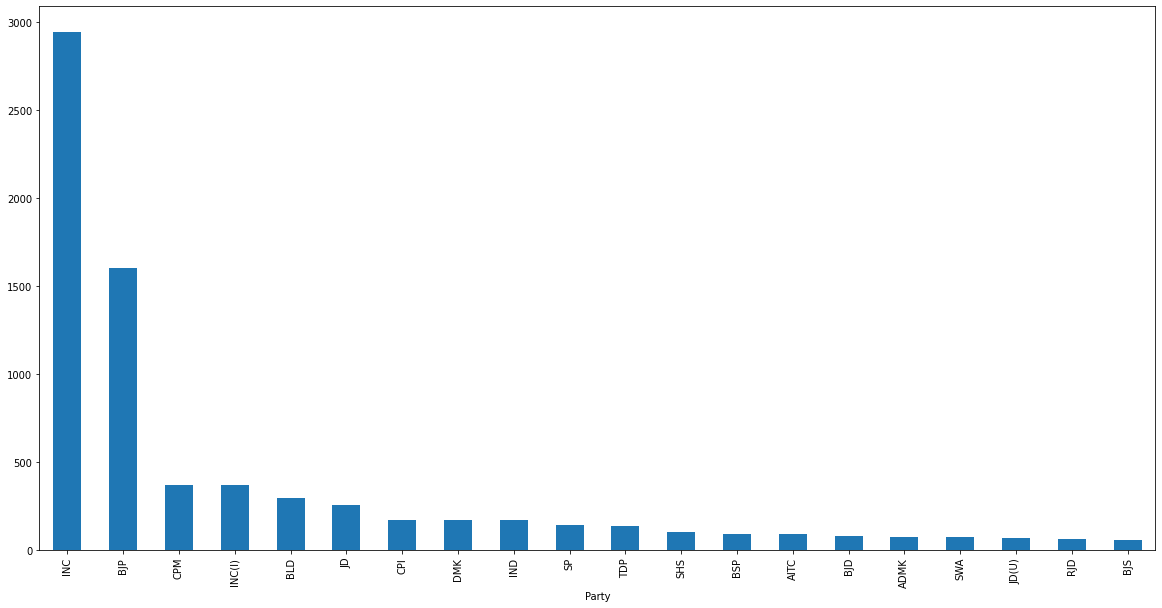

In [45]:
first_position1=df1.loc[(df1['Position']==1)]
first_position_party1=first_position.groupby(['Party'])['Party'].count().sort_values(ascending=False)
#print only top 20 parties
x1=first_position_party1.head(20)
x1.plot(kind='bar',figsize=(20,10))

In [55]:
df.columns

Index(['State_Name', 'Assembly_No', 'Constituency_No', 'Year', 'month',
       'Poll_No', 'DelimID', 'Position', 'Candidate', 'Sex', 'Party', 'Votes',
       'Candidate_Type', 'Valid_Votes', 'Electors', 'Constituency_Name',
       'Constituency_Type', 'Sub_Region', 'N_Cand', 'Turnout_Percentage',
       'Vote_Share_Percentage', 'Deposit_Lost', 'Margin', 'Margin_Percentage',
       'ENOP', 'pid', 'Party_Type_TCPD', 'Party_ID', 'last_poll', 'Contested',
       'Last_Party', 'Last_Party_ID', 'Last_Constituency_Name',
       'Same_Constituency', 'Same_Party', 'No_Terms', 'Turncoat', 'Incumbent',
       'Recontest', 'MyNeta_education', 'TCPD_Prof_Main',
       'TCPD_Prof_Main_Desc', 'TCPD_Prof_Second', 'TCPD_Prof_Second_Desc',
       'Election_Type'],
      dtype='object')

In [80]:
df3=df.drop(columns=['Assembly_No','DelimID','Candidate','Sub_Region','Last_Party','Last_Party_ID', 'Last_Constituency_Name',
       'Same_Constituency', 'Same_Party', 'No_Terms', 'Turncoat', 'Incumbent', 'Election_Type','State_Name','Sex','Candidate_Type','Constituency_Name','Constituency_Type'])

In [81]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91669 entries, 0 to 91668
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Constituency_No        91669 non-null  int64  
 1   Year                   91669 non-null  int64  
 2   month                  88590 non-null  float64
 3   Poll_No                91669 non-null  int64  
 4   Position               91669 non-null  int64  
 5   Party                  91669 non-null  int64  
 6   Votes                  91665 non-null  float64
 7   Valid_Votes            91669 non-null  int64  
 8   Electors               91649 non-null  float64
 9   N_Cand                 91669 non-null  int64  
 10  Turnout_Percentage     91649 non-null  float64
 11  Vote_Share_Percentage  91649 non-null  float64
 12  Deposit_Lost           90562 non-null  object 
 13  Margin                 91668 non-null  float64
 14  Margin_Percentage      91649 non-null  float64
 15  EN

In [82]:
df3.head()

,Constituency_No,Year,month,Poll_No,Position,Party,Votes,Valid_Votes,Electors,N_Cand,...,Party_Type_TCPD,Party_ID,last_poll,Contested,Recontest,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc
0,1,2019,4.0,0,1,612,95308.0,207296,318471.0,15,...,National Party,3482.0,True,4.0,True,Graduate Professional,Business,NaN,Social Work,NaN
1,1,2019,4.0,0,2,282,93901.0,207296,318471.0,15,...,National Party,1605.0,True,1.0,False,Graduate Professional,Liberal Profession or Professional,Lawyer,NaN,NaN
2,1,2019,4.0,0,3,617,5341.0,207296,318471.0,15,...,Independents,10809.0,True,1.0,False,Post Graduate,Agriculture,NaN,NaN,NaN
3,1,2019,4.0,0,4,2,2839.0,207296,318471.0,15,...,State-based Party (Other State),13.0,True,2.0,True,12th Pass,Business,NaN,Politics,Municipality Member
4,1,2019,4.0,0,5,392,2486.0,207296,318471.0,15,...,State-based Party (Other State),16651.0,True,1.0,False,Post Graduate,Social Work,NaN,NaN,NaN


In [83]:
X = df3.values
# Using the standard scaler method to standardize all of the features by converting them into values between -3 and +3.
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

ValueError: could not convert string to float: 'no'